In [1]:
import pandas as pd

In [2]:
df_history = pd.read_csv("./history_thalia.csv")
df_transactions = pd.read_csv("./transactions_thalia.csv")

# Erste Korrelationsanalyse zwischen Anzahl der Öffnungen von Newslettern von Kunden und Costumer Value

### Reduktion der Daten auf Kunden und ihre Anzahl an Öffnungen der Newsletter

#### 1. Erstellung von history2 als Datensatz von Art der Interaktion und Kunden_id

In [3]:
df_history['creation'] = pd.to_datetime(df_history['creation'], format='%Y%m%d%H%M%S')
df_history.rename(columns = {'id':'Eintrags_id', 'iid':'Kunden_id', 'akey':'Kampagnen_id'}, inplace = True)
df_history2 = df_history[['Kunden_id', 'attrtype']]
df_history2.head()

,Kunden_id,attrtype
0,158765280,NO
1,116420444,NO
2,100419635,NO
3,100397101,NO
4,100273782,NO


#### 2. Erstellung von df_NO als Datensatz von Kunden ihre jeweilige Häufigkeit von Öffnungen

In [4]:
df_history2["attrtype"].value_counts()

HY    2526272
NO    2447558
NC     233327
SB      46933
HB      16205
SC         37
Name: attrtype, dtype: int64

In [5]:
df_history_NO = df_history2[df_history2['attrtype'].eq("NO")]
df_history_NC = df_history2[df_history2['attrtype'].eq("NC")]
df_history_HY = df_history2[df_history2['attrtype'].eq("HY")]
df_history_HB = df_history2[df_history2['attrtype'].eq("HB")]
df_history_SB = df_history2[df_history2['attrtype'].eq("SB")]
df_history_SC = df_history2[df_history2['attrtype'].eq("SC")]

In [6]:
df_NO = df_history_NO.groupby(['Kunden_id'])['Kunden_id'].agg('count')
df_NO.describe()

count    127787.000000
mean         19.153419
std          40.686286
min           1.000000
25%           3.000000
50%           6.000000
75%          17.000000
max        1388.000000
Name: Kunden_id, dtype: float64

In [7]:
df_NO.head()

Kunden_id
100001735    201
100001769     87
100001784     40
100001938      2
100002345      8
Name: Kunden_id, dtype: int64

#### 3. Erstellung von df_t_value als Datensatz von Kunden_id und Costumer value

In [8]:
df_t = df_transactions
df_t["iid"].nunique()

191634

#### Löschung von Transaktiondaten mit negativem Pricetotal

In [9]:
df_t_value_positive = df_t[df_t['pricetotal']>=0]

In [10]:
df_t_value = df_t_value_positive.groupby(['iid'])['pricetotal'].agg('sum')
df_t_value.describe()

count    1.916290e+05
mean     2.088994e+02
std      5.930725e+03
min      0.000000e+00
25%      3.200000e+01
50%      6.780000e+01
75%      1.395000e+02
max      2.498387e+06
Name: pricetotal, dtype: float64

#### 4. Zusammenfügen von Costumer Value und Interaktionsanzahl über Kunden_id

In [11]:
df_t_value.name = "Costumer Value"
df_t_value.index.name ="Kunden_id"
df_t_value.head()

Kunden_id
100002747     155.0
100009615     131.6
100009745    1160.0
100011333     172.0
100011954    1206.1
Name: Costumer Value, dtype: float64

In [12]:
df_NO.name = "Anzahl an Interaktionen"
df_NO.index.name ="Kunden_id"
df_NO.head()

Kunden_id
100001735    201
100001769     87
100001784     40
100001938      2
100002345      8
Name: Anzahl an Interaktionen, dtype: int64

In [13]:
df_corr = pd.merge(df_t_value, df_NO, on = "Kunden_id")
df_corr.head()

,Costumer Value,Anzahl an Interaktionen
Kunden_id,,
100002747,155.0,5
100009745,1160.0,6
100011333,172.0,28
100011954,1206.1,63
100013945,74.7,3


#### 5. Berechnung der Korrelation

In [14]:
df_corr.corr()

,Costumer Value,Anzahl an Interaktionen
Costumer Value,1.00000,0.02779
Anzahl an Interaktionen,0.02779,1.00000


#### 6. Verteilungsfunktion von Costumer Value/ Anzahl an Interaktion

In [23]:
df_verteilung = df_corr
import matplotlib.pyplot as plt

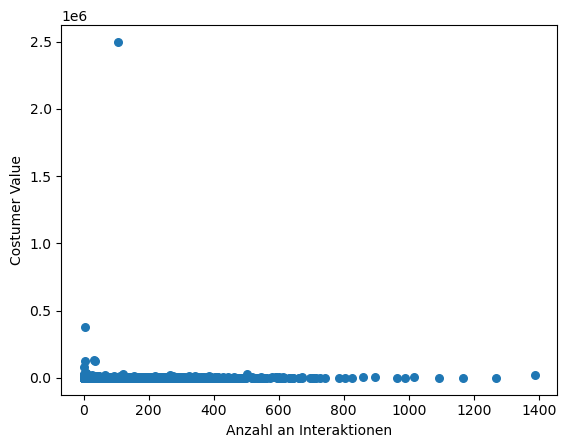

In [25]:
x = df_verteilung["Anzahl an Interaktionen"]
y = df_verteilung["Costumer Value"]
plt.scatter(x, y, s=30)
plt.xlabel('Anzahl an Interaktionen')
plt.ylabel('Costumer Value')
plt.show()

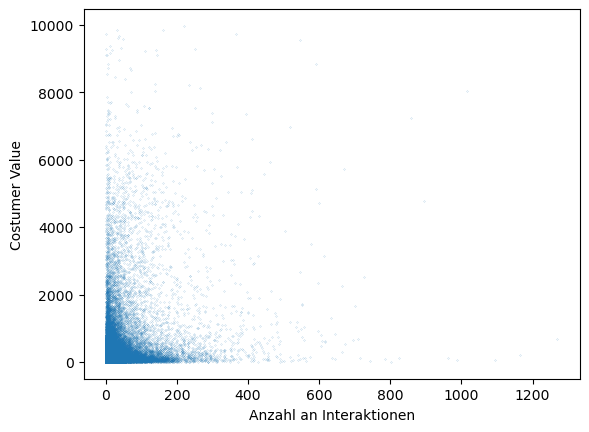

In [37]:
df_verteilung_kleiner30k = df_verteilung[df_verteilung['Costumer Value']<=10000]
x = df_verteilung_kleiner30k["Anzahl an Interaktionen"]
y = df_verteilung_kleiner30k["Costumer Value"]
plt.scatter(x, y, s=0.01)
plt.xlabel('Anzahl an Interaktionen')
plt.ylabel('Costumer Value')
plt.show()

In [48]:
import numpy as np 

C:\Users\felix.oechslein\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


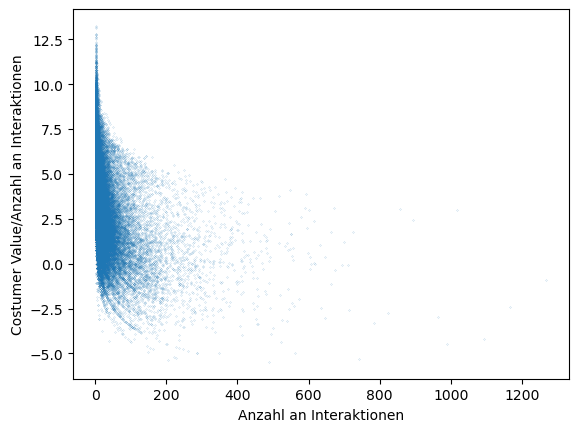

In [49]:
df_verteilung_Quotient = df_verteilung[df_verteilung['Costumer Value']<=10000]["Costumer Value"] / df_verteilung[df_verteilung['Costumer Value']<=10000]["Anzahl an Interaktionen"]
x = df_verteilung_kleiner30k["Anzahl an Interaktionen"]
y = np.log2(df_verteilung_Quotient)
plt.scatter(x, y, s=0.01)
plt.xlabel('Anzahl an Interaktionen')
plt.ylabel('Costumer Value/Anzahl an Interaktionen')
plt.show()